## Find Missing Data/Hours ##

This script finds and visualizes missing data in main dataset.

<BarContainer object of 24 artists>

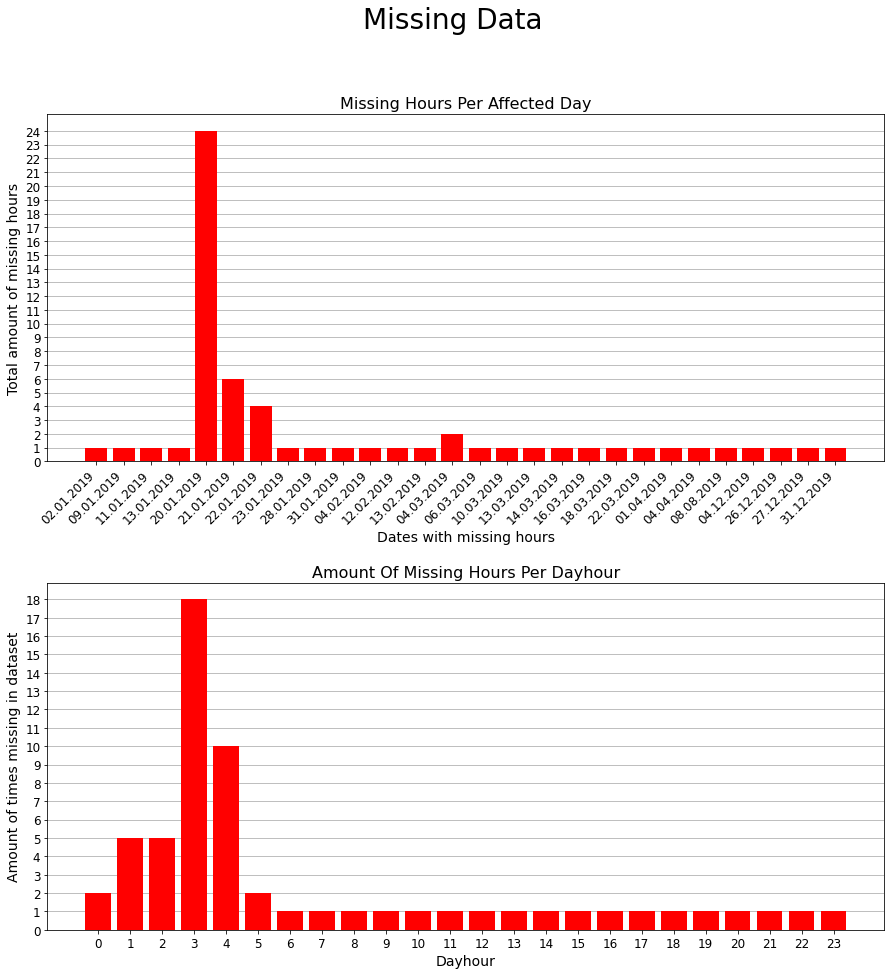

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Prepare dataset
Dataset = pd.read_csv("boston_2019.csv")
df = pd.DataFrame(Dataset['start_time'])
times = pd.to_datetime(df.start_time)
df['start_time'] = times.dt.floor('h')

# Define Test dataset and an array with all possible hours over 2019
df_test = pd.DataFrame(df['start_time'].unique())
df_test.columns = ['unique_hour']
daterange = pd.date_range(df_test['unique_hour'].iloc[0], df_test['unique_hour'].iloc[8699], freq='h')
df_all_dates = pd.DataFrame(daterange)
df_all_dates.columns = ['unique_hour']

# Save missing data in a new DataFrame
df_difference = pd.concat([df_test, df_all_dates]).drop_duplicates(keep=False)

# Count missing data over dates and save as CSV
unique_hour_agg = pd.DataFrame(df_difference['unique_hour'].groupby(df_difference['unique_hour'].dt.date).count())
unique_hour_agg.reset_index(drop=True, inplace=False)
unique_hour_agg.columns = ['count']
unique_hour_agg.to_csv('Missing_hours.csv')

# Visualize amount of missing hours over days
unique_hour_agg.index = pd.to_datetime(unique_hour_agg.index).strftime('%d.%m.%Y')
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.35)
fig.suptitle('Missing Data', fontsize=28)
subplotMissingData = fig.add_subplot(2,1,1)
subplotMissingData.grid(axis = 'y', zorder=0)
subplotMissingData.set_title('Missing Hours Per Affected Day', fontsize=16)
subplotMissingData.set_ylabel('Total amount of missing hours', fontsize=14)
subplotMissingData.set_xlabel('Dates with missing hours', rotation = 0, fontsize=14)
subplotMissingData.set_xticks(np.arange(0, len(unique_hour_agg)))
subplotMissingData.set_xticklabels(unique_hour_agg.index, rotation = 45, ha='right', fontsize=12)
subplotMissingData.set_yticks(np.arange(0,25))
subplotMissingData.set_yticklabels(np.arange(0,25), fontsize=12)
subplotMissingData.bar(np.arange(0, len(unique_hour_agg)), unique_hour_agg['count'], color='red', zorder=3)

# Visualize amount of missing hours per daytime
unique_hour_agg_2 = pd.DataFrame(df_difference['unique_hour'].groupby(df_difference['unique_hour'].dt.hour).count())
unique_hour_agg_2.reset_index(drop=True, inplace=False)
unique_hour_agg_2.columns = ['count']
unique_hour_agg_2
subplotMissingData_2 = fig.add_subplot(2,1,2)
subplotMissingData_2.grid(axis = 'y', zorder=0)
subplotMissingData_2.set_title('Amount Of Missing Hours Per Dayhour', fontsize=16)
subplotMissingData_2.set_ylabel('Amount of times missing in dataset', fontsize=14)
subplotMissingData_2.set_xlabel('Dayhour', rotation = 0, fontsize=14)
subplotMissingData_2.set_xticks(np.arange(0, len(unique_hour_agg_2)))
subplotMissingData_2.set_xticklabels(unique_hour_agg_2.index, fontsize=12)
subplotMissingData_2.set_yticks(np.arange(0,25))
subplotMissingData_2.set_yticklabels(np.arange(0,25), fontsize=12)
subplotMissingData_2.bar(np.arange(0, len(unique_hour_agg_2)), unique_hour_agg_2['count'], color='red', zorder=3)

In [2]:
# Save the picture as PNG and PDF file
fig.savefig('Missing_Data.pdf', dpi=300)
fig.savefig('Missing_Data.png', dpi=300)